In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_context("paper")
sns.set(font_scale = 1.6)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

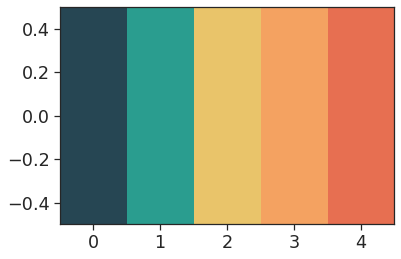

In [26]:
from matplotlib import colors
palette = ['#264653', '#2A9D8F','#E9C46A', '#F4A261', '#E76F51']
cmap = colors.ListedColormap(palette)

plt.imshow(np.arange(len(palette)).reshape(1, -1), aspect='auto', cmap=cmap,origin="lower")
plt.show()

In [9]:
training_file = '/home/lugeon/eeg_project/scripts/training/result/repr_learning_baseline/loss.txt'
training_history = pd.read_csv(training_file, sep=' ')
training_history.head()

,epoch,training,validation
0,0,62001.96,48159.76
1,1,49126.52,44627.74
2,2,46233.99,42294.95
3,3,44409.30,40601.68
4,4,43012.81,39152.25


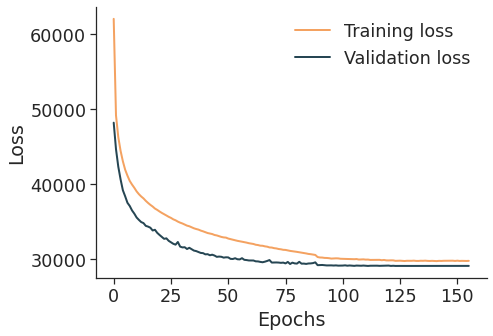

In [37]:
fig, ax = plt.subplots(figsize=(7, 5))

x = training_history.epoch

plt.plot(x, training_history.training, label='Training loss', color=cmap(3), linewidth=2)
plt.plot(x, training_history.validation, label='Validation loss', color=cmap(0), linewidth=2)

plt.legend(frameon=False)

plt.xlabel('Epochs')
plt.ylabel('Loss')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()